In [1]:
#Library importing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.keras import datasets,layers,models
import cv2 as cv
import sklearn
import os
import scipy
# from sklearn.model_selection import train_test_split

In [2]:
#Menyiapkan datasets

train_mentah_dir = os.path.join('train/Pisang Mentah')
train_matang_dir = os.path.join('train/Pisang Matang')
train_setmatang_dir = os.path.join('train/Pisang SetMatang')

valid_mentah_dir = os.path.join('valid/Pisang Mentah')
valid_matang_dir = os.path.join('valid/Pisang Matang')
valid_setmatang_dir = os.path.join('valid/Pisang SetMatang')


In [3]:
# Mengecek banyaknya data

print('total training Pisang Mentah images:', len(os.listdir(train_mentah_dir)))
print('total training Pisang Matang images:', len(os.listdir(train_matang_dir)))
print('total training Pisang SetMatang images:', len(os.listdir(train_setmatang_dir)))

print('total validation Pisang Mentah images:', len(os.listdir(valid_mentah_dir)))
print('total validation Pisang Matang images:', len(os.listdir(valid_matang_dir)))
print('total validation Pisang SetMatang images:', len(os.listdir(valid_setmatang_dir)))


total training Pisang Mentah images: 284
total training Pisang Matang images: 331
total training Pisang SetMatang images: 88
total validation Pisang Mentah images: 17
total validation Pisang Matang images: 13
total validation Pisang SetMatang images: 10


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
nrows = 4
ncols = 4
pic_index = 0

In [6]:
train_mentah_names =os.listdir(train_mentah_dir)
train_matang_names = os.listdir(train_matang_dir)
train_setmatang_names = os.listdir(train_setmatang_dir)


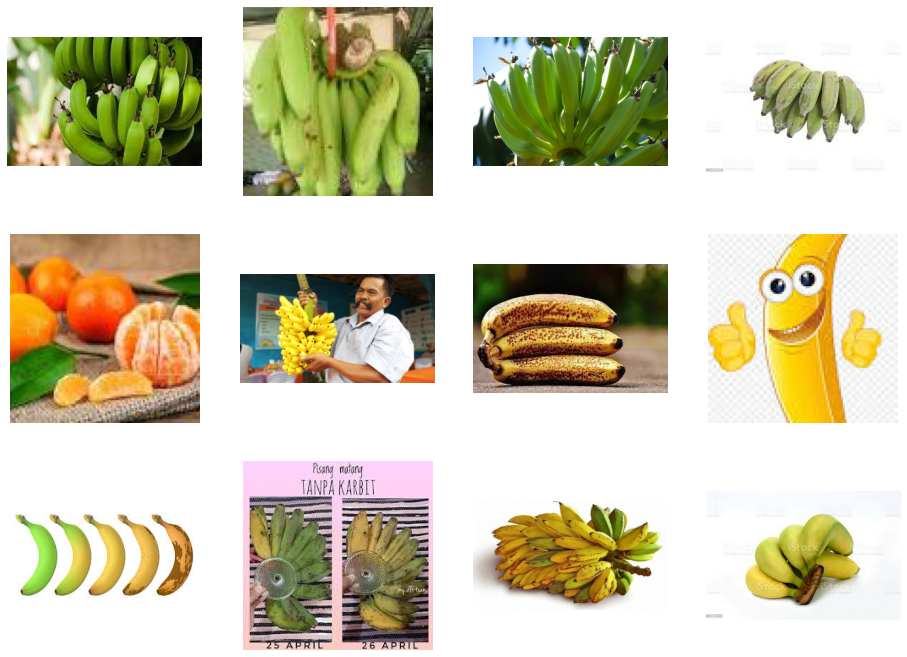

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_mentah_pic = [os.path.join(train_mentah_dir, fname) 
                for fname in train_mentah_names[pic_index-4:pic_index]]
next_matang_pic = [os.path.join(train_matang_dir, fname) 
                for fname in train_matang_names[pic_index-4:pic_index]]
next_setmatang_pic = [os.path.join(train_setmatang_dir, fname) 
                for fname in train_setmatang_names[pic_index-4:pic_index]]


for i, img_path in enumerate(next_mentah_pic + next_matang_pic + next_setmatang_pic):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)
 

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train/',  # This is the source directory for training images
        classes = ['Pisang Mentah', 'Pisang Matang','Pisang SetMatang'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'valid/',  # This is the source directory for training images
        classes = ['Pisang Mentah', 'Pisang Matang','Pisang SetMatang'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 696 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [10]:
model = Sequential()

# Conv Layer pertama
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2,2))

# Conv Layer kedua
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer keempat
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))


# # Conv Layer kelima
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))




# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(64,activation = 'relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-05 21:58:01.703316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-05 21:58:01.703992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
    #   steps_per_epoch=9,  
      epochs=40,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=20)

2022-04-05 21:58:02.181614: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/40


2022-04-05 21:58:02.387119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.4612

2022-04-05 21:58:05.612830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 4s 519ms/step - loss: 0.6213 - accuracy: 0.4612 - val_loss: 0.3475 - val_accuracy: 0.3143
Epoch 2/40
6/6 [==============================] - 2s 307ms/step - loss: 0.5759 - accuracy: 0.4727
Epoch 3/40
6/6 [==============================] - 2s 339ms/step - loss: 0.5118 - accuracy: 0.4727
Epoch 4/40
6/6 [==============================] - 2s 335ms/step - loss: 0.3537 - accuracy: 0.4727
Epoch 5/40
6/6 [==============================] - 2s 324ms/step - loss: -0.0107 - accuracy: 0.5072
Epoch 6/40
6/6 [==============================] - 2s 317ms/step - loss: -1.4535 - accuracy: 0.7026
Epoch 7/40
6/6 [==============================] - 2s 328ms/step - loss: -8.2504 - accuracy: 0.7371
Epoch 8/40
6/6 [==============================] - 2s 309ms/step - loss: -41.9016 - accuracy: 0.7155
Epoch 9/40
6/6 [==============================] - 2s 316ms/step - loss: -193.2993 - accuracy: 0.7241
Epoch 10/40
6/6 [==============================] - 2s 328ms/step - loss: -631.8